In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as st
import statsmodels.tsa as ts

from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
plt.style.use("ggplot")
sns.set_context("talk")

pd.options.display.float_format = "{:.2f}".format

In [26]:
def dateparse(x):
    return pd.datetime.strptime(x, '%Y-%m-%d')

In [67]:
df = pd.read_csv("data/usa_cy.csv", parse_dates=['dateid01'], date_parser=dateparse)[64:-32]
df.index = df.dateid01
df.drop(columns=["dateid01", "dateid"], inplace=True)
df.head()

,assets,assets_fin,assets_nonfinancial,c_deflator,consumer_sentiment,cpi,gov_debt,gov_transfers,house_prices,interest_payments,...,rly,rnw,ry,saving,saving_rate,sb_1975_4,unemp,y_deflator,yield_10y,yield_3m
dateid01,,,,,,,,,,,,,,,,,,,,,
1961-01-01,2345829.50,1609820.50,736009.00,0.18,91.60,29.84,nan,0.90,nan,6.50,...,2095.48,11955605.43,2443.30,41.70,10.90,1,6.90,0.18,3.79,nan
1961-04-01,2373420.90,1625285.90,748135.00,0.18,92.50,29.84,nan,0.90,nan,6.50,...,2128.59,12142590.76,2491.20,42.60,10.90,1,6.90,0.18,3.79,nan
1961-07-01,2414369.60,1654816.60,759553.00,0.18,99.20,29.98,nan,1.00,nan,6.50,...,2156.47,12344141.09,2502.80,46.20,11.70,1,6.70,0.18,3.98,nan
1961-10-01,2475821.00,1706206.00,769615.00,0.18,93.00,30.01,nan,1.00,nan,6.60,...,2196.29,12508718.59,2564.50,46.90,11.60,1,6.00,0.18,3.97,nan
1962-01-01,2490219.00,1710811.00,779408.00,0.18,99.90,30.17,nan,1.10,nan,6.60,...,2217.87,12540726.68,2590.10,47.20,11.50,1,5.60,0.18,4.02,3.39


In [68]:
df.rdy.tail(10)

dateid01
2005-07-01   10214.50
2005-10-01   10298.70
2006-01-01   10534.00
2006-04-01   10549.80
2006-07-01   10579.90
2006-10-01   10718.40
2007-01-01   10788.70
2007-04-01   10809.50
2007-07-01   10837.90
2007-10-01   10847.00
Name: rdy, dtype: float64

In [69]:
df.rc.tail(10)

dateid01
2005-07-01    9585.20
2005-10-01    9621.30
2006-01-01    9729.20
2006-04-01    9781.00
2006-07-01    9838.10
2006-10-01    9938.40
2007-01-01    9990.70
2007-04-01   10024.60
2007-07-01   10069.20
2007-10-01   10081.80
Name: rc, dtype: float64

In [70]:
df.rnw.tail(10)

dateid01
2005-07-01   65364049.91
2005-10-01   65955692.60
2006-01-01   67922794.09
2006-04-01   67411245.45
2006-07-01   67712271.22
2006-10-01   69603755.33
2007-01-01   70047247.28
2007-04-01   70196751.19
2007-07-01   69819722.17
2007-10-01   67819272.56
Name: rnw, dtype: float64

In [77]:
df["const"] = 1 
df["ln_rc"] = np.log(df.rc)
df["ln_rdy"] = np.log(df.rdy)
df["ln_rnw"] = np.log(df.rnw)
df["rc_rdy"] = df.rc/df.rdy
df["rnw_rdy"] = df.rnw/df.rdy
df["log_rc_rdy"] = np.log(df.rc/df.rdy)
df["log_rnw_rdy"] = np.log(df.rnw/df.rdy)

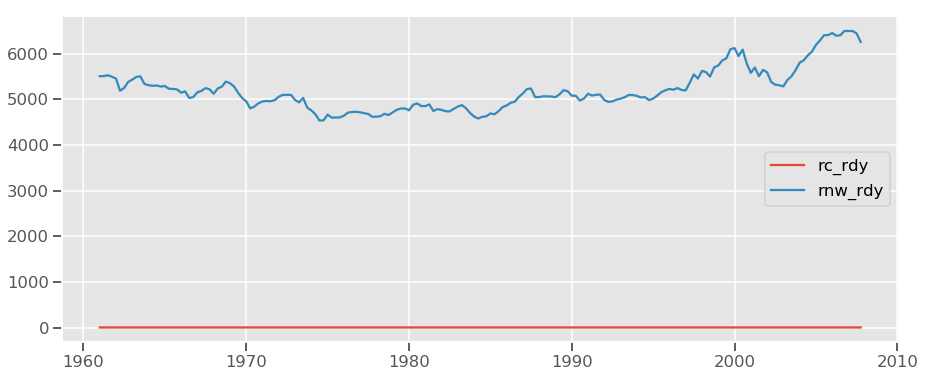

In [72]:
plt.figure(figsize=(15,6))
plt.plot(df.rc_rdy)
plt.plot(df.rnw_rdy)
plt.legend()
plt.show()

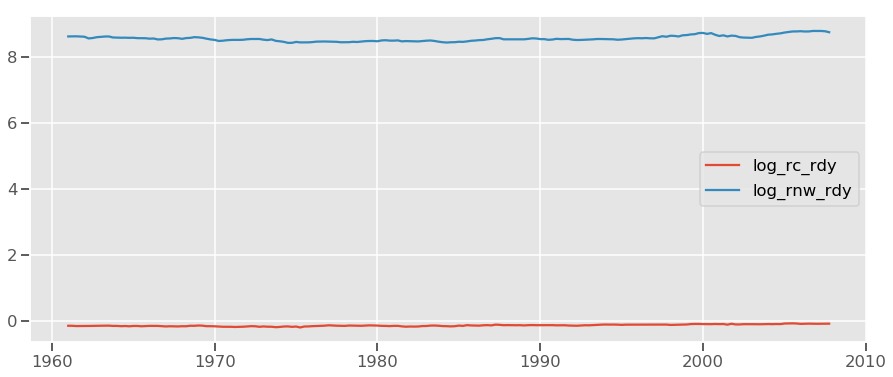

In [73]:
plt.figure(figsize=(15,6))
plt.plot(df.log_rc_rdy)
plt.plot(df.log_rnw_rdy)
plt.legend()
plt.show()

No handles with labels found to put in legend.


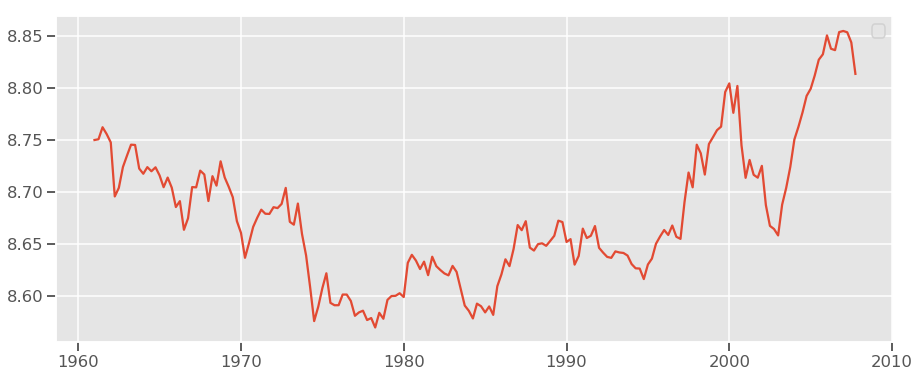

In [74]:
plt.figure(figsize=(15,6))
plt.plot(df.log_rnw_rdy-df.log_rc_rdy)
plt.legend()
plt.show()

In [75]:
model = sm.OLS(endog=df.log_rc_rdy,
               exog=sm.add_constant(df.log_rnw_rdy)).fit()
model.summary()

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_rc_rdy   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     229.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.90e-34
Time:                        11:15:02   Log-Likelihood:                 481.12
No. Observations:                 188   AIC:                            -958.2
Df Residuals:                     186   BIC:                            -951.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1949      0.137    -16.056      0.000      -2.465      -1.925
log_rnw_rdy     0.2420      0.016     15.139      0.000       0.210       0.274
==============================================================================
Omnibus:                       28.139   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.479
Skew:                          -0.333   Prob(JB):                      0.00530
Kurtosis:                       2.055   Cond. No.                         863.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No handles with labels found to put in legend.


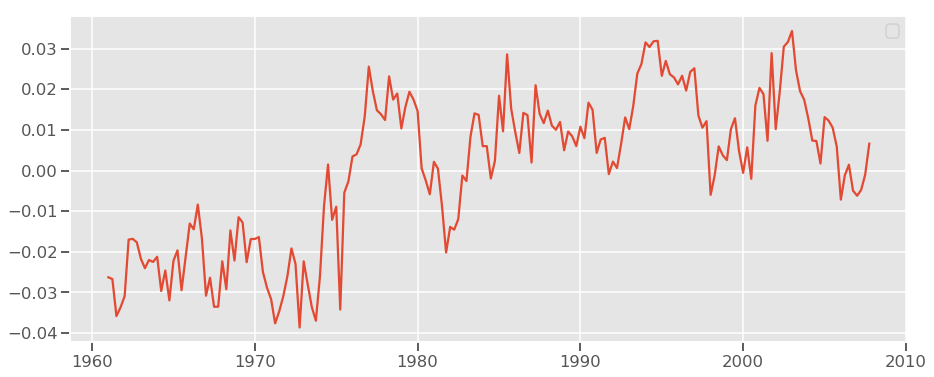

In [76]:
plt.figure(figsize=(15,6))
plt.plot(model.resid)
plt.legend()
plt.show()

## Long Run Model for Real Consumption

Specify a long-run predictive equation for real consumption using any variables available. Be sure to state your priors for the correct signs of the coefficients. It would be helpful if your model was expressed in “log” form, so that the parameter estimates are elasticities. Make sure to build your own model with your own right hand side variables. In parallel follow the guidelines bellow and apply the methodology detailed below to your own model. In the end you should be able to compare your results to the model(s) proposed below.

Consider the following long-run model for U.S. real consumption:

ln(rc) = b0 + b1 ln(rdy) + b2 ln(rnw) + e

where rc is real consumption, rdy is real disposable income, and rnw is real net worth. All of these variables are available in the provided workfile.

## Question 8.4

Determine the statistical properties of the variables you chose to include in your own model (I(0) versus I(1)), by formally testing for unit roots in the data. In the context of the model suggested above, run the unit root tests of log(rc), log(rdy) and log(rnw), allowing for an intercept in the fitted regression, together with the suggested optimal number of lags using the SIC criterion. What are the p-values of the ADF tests? Please indicate your answer below using only three decimal places, and without any no rounding? Hint: Use the command uroot log(rc) for the unit root test of log(rc) for example.

In [81]:
model = sm.OLS(endog=df.ln_rc,
               exog=df.loc[:, ["const", "ln_rdy", "ln_rnw"]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ln_rc   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.598e+05
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          3.36e-300
Time:                        11:17:56   Log-Likelihood:                 576.71
No. Observations:                 188   AIC:                            -1147.
Df Residuals:                     185   BIC:                            -1138.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7146      0.087    -19.795      0.000      -1.885      -1.544
ln_rdy         0.8907      0.012     73.498      0.000       0.867       0.915
ln_rnw         0.1475      0.011     13.453      0.000       0.126       0.169
==============================================================================
Omnibus:                        9.810   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.991
Skew:                          -0.557   Prob(JB):                      0.00677
Kurtosis:                       3.180   Cond. No.                     2.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
ts.stattools.adfuller(df.ln_rc, maxlag=15, autolag="AIC")

(-1.182066329258282,
 0.681262359866784,
 3,
 184,
 {'1%': -3.466398230774071,
  '5%': -2.8773796387256514,
  '10%': -2.575213838610586},
 -1247.1626715889827)

In [93]:
ts.stattools.adfuller(df.ln_rdy, maxlag=15, autolag="AIC")

(-2.470532968751172,
 0.12280956241057472,
 0,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 -1153.4118360025807)

In [94]:
ts.stattools.adfuller(df.ln_rnw, maxlag=15, autolag="AIC")

(0.963549263556457,
 0.9938660667875909,
 12,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 -955.2612628116876)

## Cointegration test

Given that all variables ln(rct), ln(rdyt), and ln(rnw)) are consistent with the I(1) hypothesis and possibly cointegrated, we can use Johansen’s trace/max eigenvalue statistic to test for the existence of a common trend (i.e., a long-run relationship).

First, estimate the VAR model of ln(rct), ln(rdyt), and ln(rnwt), initially using an ad-hoc number of lags, say 2. (Write “VAR” in the command window and press “Enter”). We also include the dummy variable “sb_1975_4”, as an exogenous variable, to allow for the possibility of a structural break prior to 1976.

In [95]:
model = ts.vector_ar.var_model.VAR(endog=df.loc[:, ["ln_rc", "ln_rdy", "ln_rnw"]],
                                   exog=df.sb_1975_4
                                  ).fit(maxlags=2)
model.summary()

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Nov, 2019
Time:                     14:05:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.9351
Nobs:                     186.000    HQIC:                  -28.1826
Log likelihood:           1868.90    FPE:                4.86691e-13
AIC:                     -28.3513    Det(Omega_mle):     4.28930e-13
--------------------------------------------------------------------
Results for equation ln_rc
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.152593         0.110102           -1.386           0.166
exog0            -0.002220         0.002305           -0.963           0.336
L1.ln_rc          1.048764         0.081839           12.815           0.000

In [96]:
ts.vector_ar.var_model.VAR(endog=df.loc[:, ["ln_rc", "ln_rdy", "ln_rnw"]],
                                   exog=df.sb_1975_4
                                  ).select_order(maxlags=12).summary()

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


,AIC,BIC,FPE,HQIC
0,-17.67,-17.56,2.126e-08,-17.62
1,-28.24,-27.97*,5.447e-13,-28.13
2,-28.33*,-27.90,4.949e-13*,-28.16*
3,-28.32,-27.73,5.006e-13,-28.08
4,-28.30,-27.55,5.108e-13,-28.00
5,-28.33,-27.41,4.971e-13,-27.96
6,-28.33,-27.25,4.971e-13,-27.89
7,-28.32,-27.07,5.056e-13,-27.81
8,-28.29,-26.88,5.233e-13,-27.72
9,-28.26,-26.70,5.359e-13,-27.63


In [105]:
model.resid_acorr(nlags=12)

array([[[ 1.00000000e+00,  4.36527073e-01,  2.76345840e-01],
        [ 4.36527073e-01,  1.00000000e+00,  2.38370720e-01],
        [ 2.76345840e-01,  2.38370720e-01,  1.00000000e+00]],

       [[-4.90177274e-02, -4.02449896e-02, -2.63657168e-02],
        [ 1.78409816e-02,  2.09362720e-02,  1.69324576e-02],
        [-4.23345175e-02, -2.82784917e-02, -2.40334877e-02]],

       [[ 1.03844832e-01,  6.13296223e-02,  5.63519176e-02],
        [-7.75219988e-02,  6.38572384e-04, -5.47214056e-02],
        [ 3.39802876e-02,  2.81040411e-02,  2.98005159e-02]],

       [[ 2.16092452e-01,  9.13629546e-02,  7.29927791e-02],
        [ 9.20032317e-02, -3.20625441e-04, -3.00667418e-02],
        [ 1.90271549e-01,  9.51128698e-02,  2.17620551e-01]],

       [[-2.29596994e-02, -3.16436764e-02,  8.07241749e-02],
        [ 7.84196898e-02, -2.85884635e-02,  1.05700672e-01],
        [-1.09495906e-01, -8.13681961e-02, -2.27650344e-01]],

       [[-3.00746645e-02, -3.50960116e-02, -3.72161849e-02],
        [-1.59

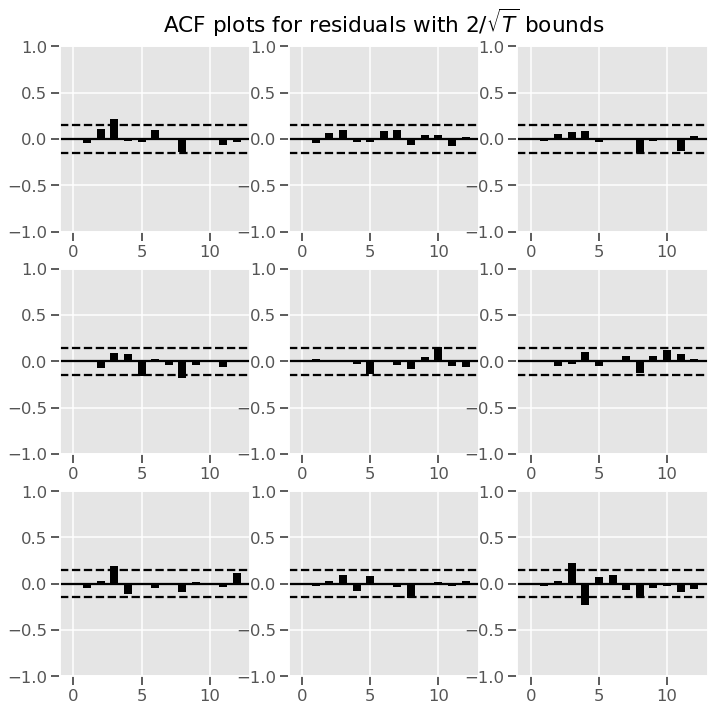

In [104]:
model.plot_acorr(nlags=12, resid=True)
plt.show()

In [114]:
sm.stats.diagnostic.het_white(model.resid.ln_rc, df.loc[:, ["ln_rc", "ln_rdy", "ln_rnw"]][2:])

AssertionError: 

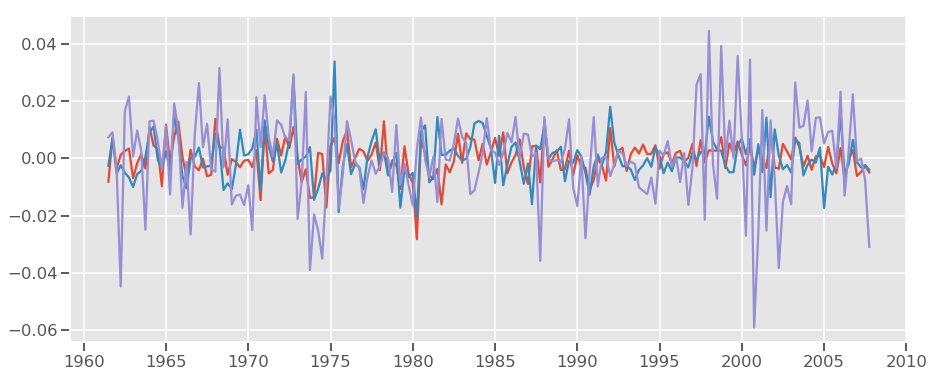

In [116]:
plt.figure(figsize=(15,6))
plt.plot(model.resid)
plt.show()

In [119]:
pd.DataFrame(st.stattools.jarque_bera(model.resid), index=["JB", "JBpv", "skew", "kuotosis"]).T

,JB,JBpv,skew,kuotosis
0,47.20,0.00,-0.62,5.14
1,63.76,0.00,0.66,5.54
2,12.60,0.00,-0.33,4.09
